In [1]:
# Libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
!pip install chardet
import chardet

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

### 2. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [2]:
# Getting character format
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']

# Import data

df_dengue = pd.read_csv( r'../../_data/data_dengue_peru.csv', encoding = charenc, dtype={'Ubigeo': 'str'},low_memory = False)
df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


### 3. Generate ubigeo for Departments and Provinces taking the first two and four numbers.

In [3]:
df_dengue['IDPROV'] = df_dengue['Ubigeo'].astype(str).str[0:4]
df_dengue['IDDPTO'] = df_dengue['Ubigeo'].astype(str).str[0:2]

df_dengue=df_dengue.rename({'Ubigeo': 'IDDIST'}, axis=1)
df_dengue['IDDIST'] = df_dengue['IDDIST'].astype(str).astype(int)

df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0,0809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17


### 4. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [4]:
# Upload shapefile-distric level
maps = gpd.read_file(r'../../_data/shape_file/DISTRITOS.shp')
maps

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [5]:
df_dengue['Casos'] = df_dengue['Casos'].str.replace(",","")
df_dengue['Casos'] = df_dengue['Casos'].fillna(0)
df_dengue['Casos'] = df_dengue['Casos'].astype(str).astype(int)
df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0,0809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,0809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17


In [6]:
df_dengue_2021d = df_dengue[df_dengue.Año == 2021]
df_dengue_2021d

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,0,1501,15
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,0,1501,15
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,0,1501,15
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17


In [7]:
df_dengue_2021d['Distrito'].unique().size

449

In [8]:
# group_by district
df_dengue_districts= df_dengue.groupby(['IDDIST'])['Casos'].sum().reset_index().copy()
df_dengue_districts

,IDDIST,Casos
0,10101,6
1,10201,949
2,10202,49
3,10203,47
4,10204,10
...,...,...
470,250302,125
471,250303,187
472,250304,45
473,250305,8


In [9]:
# group_by district
#df_dengue_districts = df_dengue.copy()
#df_dengue_districts['Casos_distrito'] = df_dengue_districts.groupby(['Distrito'])['Casos_distrito'].transform('sum')

# Merge geometry with data
maps['IDDIST'] = maps['IDDIST'].astype(str).astype(int)

maps1 = maps[['IDDIST','DISTRITO', 'geometry']]
data_geo1 = maps1.merge(df_dengue_districts, on='IDDIST', how='left')
data_geo1

,IDDIST,DISTRITO,geometry,Casos
0,100902,CODO DEL POZUZO,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",49.0
1,100904,TOURNAVISTA,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",56.0
2,250305,ALEXANDER VON HUMBOLDT,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",8.0
3,250302,IRAZOLA,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",125.0
4,250304,NESHUYA,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",45.0
...,...,...,...,...
1868,100608,CASTILLO GRANDE,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",562.0
1869,100609,PUEBLO NUEVO,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...",22.0
1870,100610,SANTO DOMINGO DE ANDA,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...",NaN
1871,211105,SAN MIGUEL,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...",NaN


In [10]:
base=gpd.GeoDataFrame(data_geo1, geometry=data_geo1.geometry)

In [11]:
base

,IDDIST,DISTRITO,geometry,Casos
0,100902,CODO DEL POZUZO,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",49.0
1,100904,TOURNAVISTA,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",56.0
2,250305,ALEXANDER VON HUMBOLDT,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",8.0
3,250302,IRAZOLA,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",125.0
4,250304,NESHUYA,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",45.0
...,...,...,...,...
1868,100608,CASTILLO GRANDE,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",562.0
1869,100609,PUEBLO NUEVO,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...",22.0
1870,100610,SANTO DOMINGO DE ANDA,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...",NaN
1871,211105,SAN MIGUEL,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...",NaN


<AxesSubplot:>

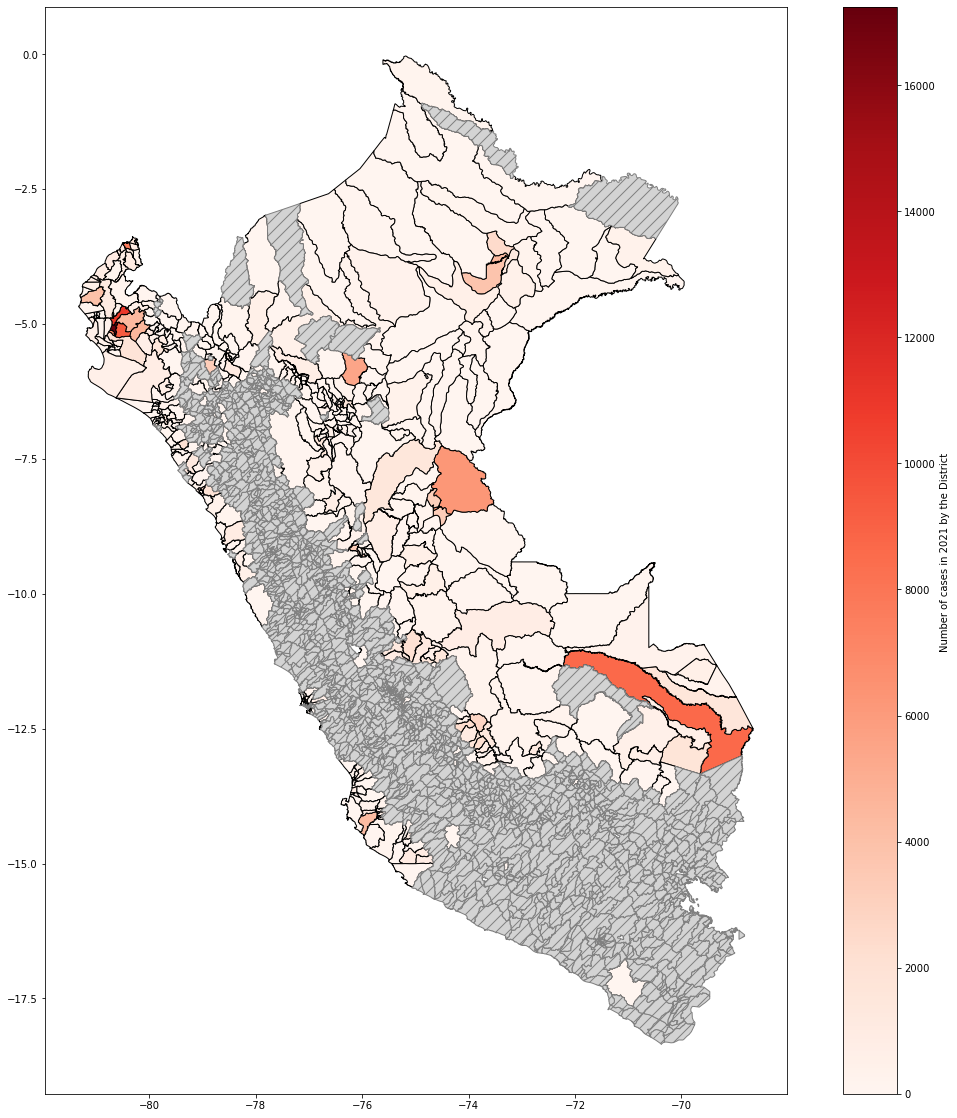

In [12]:
base.plot( column='Casos', cmap='Reds', 
              figsize=(20, 20), 
              linestyle='-',
              edgecolor='black', 
              missing_kwds= {
                  "color": "lightgrey",
                  "edgecolor": "gray",
                  "hatch": "//",
                "label": "Missing values",},
              legend = True, legend_kwds={'label': "Number of cases in 2021 by the District ",
                'orientation': "vertical"})

### 5. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.


In [13]:
# group_by district
df_dengue['IDPROV'] = df_dengue['IDPROV'].astype(str).astype(int)
df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0,809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17


In [14]:
df_dengue_2021p = df_dengue[df_dengue.Año == 2021]
df_dengue_province= df_dengue_2021p.groupby(['IDPROV'])['Casos'].sum().reset_index().copy()
df_dengue_province

,IDPROV,Casos
0,101,0
1,102,676
2,103,0
3,104,435
4,107,719
...,...,...
87,2403,72
88,2501,1241
89,2502,179
90,2503,193


In [15]:
# Merge geometry with data

maps['IDPROV'] = maps['IDPROV'].astype(str).astype(int)

maps2 = maps[['IDPROV','PROVINCIA', 'geometry']]

data_geo2 = maps2.merge(df_dengue_province, on='IDPROV', how='left')
data_geo2

,IDPROV,PROVINCIA,geometry,Casos
0,1009,PUERTO INCA,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",258.0
1,1009,PUERTO INCA,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",258.0
2,2503,PADRE ABAD,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",193.0
3,2503,PADRE ABAD,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",193.0
4,2503,PADRE ABAD,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",193.0
...,...,...,...,...
1868,1006,LEONCIO PRADO,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",2290.0
1869,1006,LEONCIO PRADO,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...",2290.0
1870,1006,LEONCIO PRADO,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...",2290.0
1871,2111,SAN ROMAN,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...",NaN


In [16]:
base= gpd.GeoDataFrame(data_geo2, geometry=data_geo2.geometry)

<AxesSubplot:>

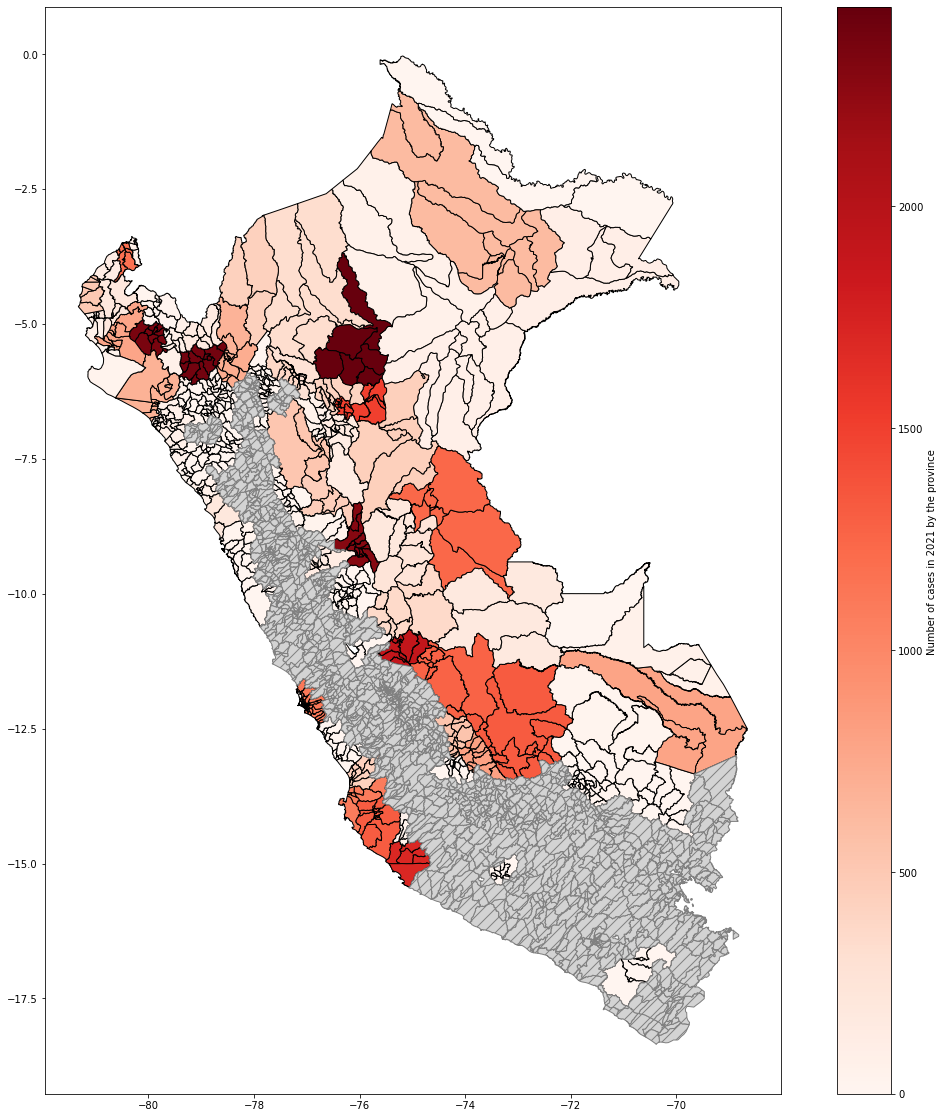

In [17]:
base.plot( column='Casos', cmap='Reds', 
              figsize=(20, 20), 
              linestyle='-',
              edgecolor='black', 
              missing_kwds= {
                  "color": "lightgrey",
                  "edgecolor": "gray",
                  "hatch": "//",
                "label": "Missing values",},
              legend = True, legend_kwds={'label': "Number of cases in 2021 by the province ",
                'orientation': "vertical"})

### 6 Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [18]:
df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0,809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17


In [19]:
# Upload shapefile-distric level
maps2 = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps2

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [20]:
#group by department and year
df_dengue['Año'] = df_dengue['Año'].astype(str).str[0:4]
df_dengue['IDDPTO'] = df_dengue['IDDPTO'].astype(str).str[0:2]
df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0,809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2,809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17


In [21]:
df_dengue_departments= df_dengue.groupby(['IDDPTO', 'Año'])['Casos'].sum().reset_index().copy()
df_dengue_departments

,IDDPTO,Año,Casos
0,01,2015,37
1,01,2016,90
2,01,2017,93
3,01,2018,109
4,01,2019,164
...,...,...,...
142,25,2017,779
143,25,2018,317
144,25,2019,214
145,25,2020,10934


In [22]:
# Merge geometry with data
maps2['CCDD'] = maps2['CCDD'].astype(str).astype(int)

maps3 = maps2[['CCDD','NOMBDEP', 'geometry']]
maps3

,CCDD,NOMBDEP,geometry
0,6,CAJAMARCA,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,6,CAJAMARCA,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,6,CAJAMARCA,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,6,CAJAMARCA,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,6,CAJAMARCA,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...
1869,4,AREQUIPA,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,4,AREQUIPA,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,4,AREQUIPA,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,4,AREQUIPA,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [23]:
maps3['IDDPTO']=maps3['CCDD']
maps3

C:\Users\User\anaconda3\envs\diplomado_new\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CCDD,NOMBDEP,geometry,IDDPTO
0,6,CAJAMARCA,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",6
1,6,CAJAMARCA,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",6
2,6,CAJAMARCA,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",6
3,6,CAJAMARCA,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",6
4,6,CAJAMARCA,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",6
...,...,...,...,...
1869,4,AREQUIPA,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",4
1870,4,AREQUIPA,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",4
1871,4,AREQUIPA,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",4
1872,4,AREQUIPA,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",4


In [24]:
#disolver mapa
dengue_departamentos = maps3.dissolve(by='CCDD')
dengue_departamentos

,geometry,NOMBDEP,IDDPTO
CCDD,,,
1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1
2,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",ANCASH,2
3,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...",APURIMAC,3
4,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6...",AREQUIPA,4
5,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1...",AYACUCHO,5
6,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462...",CAJAMARCA,6
7,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0...",CALLAO,7
8,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7...",CUSCO,8
9,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0...",HUANCAVELICA,9


In [25]:
dengue_departamentos['IDDPTO']=dengue_departamentos['IDDPTO'].astype(str).astype(int)
df_dengue_departments['IDDPTO']=df_dengue_departments['IDDPTO'].astype(str).astype(int)

In [26]:
new_df = dengue_departamentos.merge(df_dengue_departments, on=['IDDPTO'], how='left')
new_df

,geometry,NOMBDEP,IDDPTO,Año,Casos
0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,2015,37.0
1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,2016,90.0
2,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,2017,93.0
3,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,2018,109.0
4,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,2019,164.0
...,...,...,...,...,...
146,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,25,2017,779.0
147,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,25,2018,317.0
148,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,25,2019,214.0
149,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,25,2020,10934.0


In [28]:
new_df1 = new_df[new_df.isna().any(axis=1)]
new_df1

,geometry,NOMBDEP,IDDPTO,Año,Casos
14,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...",APURIMAC,3,NaN,NaN
15,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6...",AREQUIPA,4,NaN,NaN
44,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0...",HUANCAVELICA,9,NaN,NaN
136,"POLYGON ((-70.33515 -18.31557, -70.34540 -18.3...",TACNA,23,NaN,NaN


2015
2016
2017
2018
2019
2020
2021


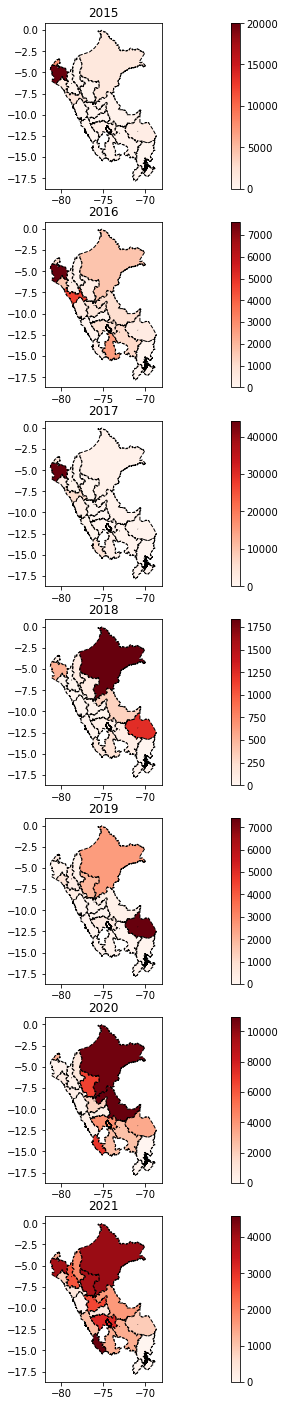

In [29]:
fig, axis = plt.subplots( nrows = 7, figsize = ( 25, 25 ) )

idx = 0
for j in range (7):
    ax = axis[ j ]
    year = new_df.Año.unique()[ idx ]
    print(year)
    df6 = new_df[ new_df.Año == year ]
    df6.plot( column='Casos', 
             cmap='Reds', 
             linestyle='--',
             edgecolor='black', 
             legend = True,
             missing_kwds={
                 "color": "lightgrey",
                 "edgecolor": "red",
                 "hatch": "///",
                 "label": "Missing values",    },
             ax = ax 
            )
        
        
    ax.set_title( year )
        
    idx = idx + 1

In [ ]:
#df6

# 7. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [ ]:
#df_dengue

In [30]:
#Select the year
df_dengue_2021 = df_dengue[df_dengue.Año == "2021"]
df_dengue_2021

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,0,1501,15
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,0,1501,15
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,0,1501,15
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17


In [31]:
df_dengue_2021_q = df_dengue_2021
df_dengue_2021_q

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,0,1501,15
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,0,1501,15
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,0,1501,15
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17


In [32]:
import pandas as pd

def quarter(row):
    if row['Semana'] < 18:
        return '1'
    elif 17 < row['Semana'] < 35 :
        return '2'
    elif row['Semana'] > 34:
        return '3'
    else:
        return '0'

#df_dengue_2021 = pd.DataFrame(data={'portion':[1, 2, 3, 4], 'used':[1.0, 0.3, 0.0, 0.8]})

df_dengue_2021_q['Quarter'] = df_dengue_2021_q.apply(quarter, axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_23272\1360708532.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue_2021_q['Quarter'] = df_dengue_2021_q.apply(quarter, axis=1)


In [33]:
df_dengue_2021_q

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,IDDIST,Casos,IDPROV,IDDPTO,Quarter
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18,3
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0,1801,18,3
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,0,1501,15,3
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,0,1501,15,3
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,0,1501,15,3
...,...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17,3
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17,3
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0,1702,17,3
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0,1703,17,3


In [ ]:
#df_dengue_2021_q.to_excel("prueba1.xlsx")

In [35]:
df_dengue_2021_departments_q= df_dengue_2021_q.groupby(['IDDPTO', 'Quarter'])['Casos'].sum().reset_index().copy()
df_dengue_2021_departments_q

,IDDPTO,Quarter,Casos
0,01,1,707
1,01,2,829
2,01,3,294
3,02,1,3
4,02,2,22
...,...,...,...
58,24,2,363
59,24,3,111
60,25,1,988
61,25,2,381


In [ ]:
#df_dengue_2021_departments_q.to_excel("prueba4.xlsx")

In [36]:
df_dengue_2021_departments_q['IDDPTO']=df_dengue_2021_departments_q['IDDPTO'].astype(str).astype(int)
df_dengue_2021_departments_q

,IDDPTO,Quarter,Casos
0,1,1,707
1,1,2,829
2,1,3,294
3,2,1,3
4,2,2,22
...,...,...,...
58,24,2,363
59,24,3,111
60,25,1,988
61,25,2,381


In [ ]:
#df_dengue_2021_departments_q['Quarter']=df_dengue_2021_departments_q['Quarter'].astype(str).astype(int)
#df_dengue_2021_departments_q

In [37]:
new_df2 = dengue_departamentos.merge(df_dengue_2021_departments_q, on=['IDDPTO'], how='left')
new_df2

,geometry,NOMBDEP,IDDPTO,Quarter,Casos
0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,1,707.0
1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,2,829.0
2,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,3,294.0
3,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",ANCASH,2,1,3.0
4,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",ANCASH,2,2,22.0
...,...,...,...,...,...
62,"POLYGON ((-80.39847 -3.98043, -80.39860 -3.980...",TUMBES,24,2,363.0
63,"POLYGON ((-80.39847 -3.98043, -80.39860 -3.980...",TUMBES,24,3,111.0
64,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,25,1,988.0
65,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,25,2,381.0


In [39]:
new_df2['Quarter'] = new_df2['Quarter'].fillna(0)
new_df2

,geometry,NOMBDEP,IDDPTO,Quarter,Casos
0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,1,707.0
1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,2,829.0
2,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,1,3,294.0
3,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",ANCASH,2,1,3.0
4,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",ANCASH,2,2,22.0
...,...,...,...,...,...
62,"POLYGON ((-80.39847 -3.98043, -80.39860 -3.980...",TUMBES,24,2,363.0
63,"POLYGON ((-80.39847 -3.98043, -80.39860 -3.980...",TUMBES,24,3,111.0
64,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,25,1,988.0
65,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,25,2,381.0


In [ ]:
new_df2_2021 = new_df2[new_df.isna().any(axis=1)]
new_df2_2021

In [ ]:
#new_df2.to_excel("prueba1.xlsx")

1
2
3


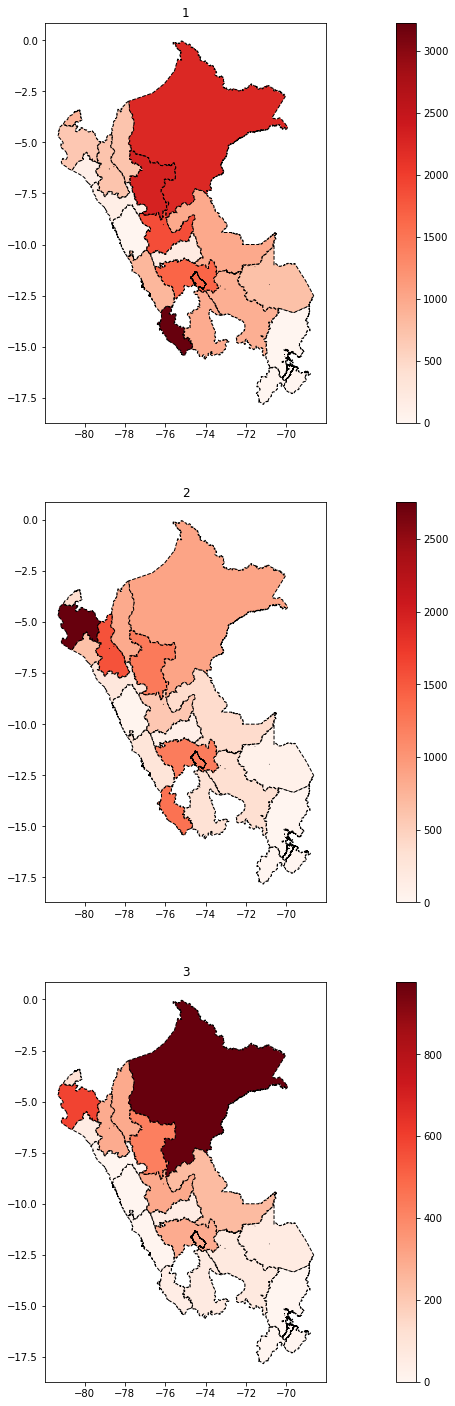

In [42]:
fig, axis = plt.subplots( nrows = 3, figsize = ( 25, 25 ) )

idx = 0
for k in range (3):
    ax = axis[ k ]
    quarter = new_df2.Quarter.unique()[ idx ]
    #df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
    #quarter.replace
    print(quarter)
    df7 = new_df2[ new_df2.Quarter == quarter ]
    df7.plot( column='Casos', 
             cmap='Reds', 
             linestyle='--',
             edgecolor='black', 
             legend = True,
             missing_kwds={
                 "color": "lightgrey",
                 "edgecolor": "red",
                 "hatch": "///",
                 "label": "Missing values",    },
             ax = ax 
            )
        
        
    ax.set_title( quarter )
        
    idx = idx + 1